# CSE 541 HW 3
Evan Komp

In [105]:
import numpy as np
import sklearn.preprocessing
import sklearn.decomposition
import sklearn.linear_model
import scipy.stats

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
sns.set_context('talk')

***
## 1

Expected regret of tau greedy

For $n$ total timesteps nature reveals $(C_t)_{t=1}^n\in \mathcal{C}$ contexts. We take an action $A_t \in [k]$ and observe reward $X_t$ based on context and action taken. Define $\mu(C_t, A_t) = \mathbb{E}(X_t) = \int x P(x|A_t,C_t)$. For policies $\phi\in\Phi: \mathcal{C}\rightarrow k$ define $\mu(\phi)=\int\mu(C,\phi(C)d\xi(C))$.

The regret of any algorithm:

$$R_n = n\cdot sup_\phi \mu(\phi) - \mathbb{E}\left[\sum_t^n X_t\right]$$

The tau greedy algorithm:

1. For $m$ rounds, select $A_t$ uniformly at random from $[k]$. Define $\hat{\mu}(\phi) = \frac{k}{m}\sum_{t=1}^m \mathbb{1}\{A_t=\phi(C_t)\}X_t$. $\hat{X}_{ti}=k\mathbb{1}\{A_t=\phi(C_t)\}X_t$
2. For $t=m,...,n$ select $A_t = [\textrm{argmax}_\phi \hat{\mu}(\phi)](C_t)$


To bound the expected regret, we first need to bound regret with high probability. We can do this by showing that our policy value estimator $\hat{\mu}$ is close to the true policy value $\mu$ by some bound. If the estimator is constructed properly, we can use bernstein's innequality to bound this difference. 

First let us prove that our estimator is unbiased:

1. $$\mathbb{E}[\hat{\mu}(\phi)] = \frac{1}{m}\sum^m_{t=1}\mathbb{E}[\hat{X}_{t\phi(C_t)}]= \frac{1}{m}\sum^m_{t=1}\mathbb{E}_{C_t\sim\mathcal{C}}[\mathbb{E}[\hat{X}_{t\phi(C_t)}|C_t]]$$

2. $$\mathbb{E}[\hat{X}_{t\phi(C_t)}|C_t] = \mathbb{E}[k\mathbb{1}\{A_t=\phi(C_t)\}X_t|C_t]$$

Noting that the probability of any arm is $1/k$ since we sampled uniformly, and the indicator is only on for one of those actions:

$$=\sum_{A_t'\in [k]}\frac{1}{k}\mathbb{E}[k\mathbb{1}\{A_t=\phi(C_t)\}X_t|C_t, A_t = A_t'] = \sum_{A_t'\in [k]}\mathbb{1}\{A_t'=\phi(C_t)\}\mu(C_t,A_t') = \mu(C_t,A_t)$$

Plugging this back into (1):

$$\frac{1}{m}\sum^m_{t=1}\mathbb{E}_{C_t\sim\mathcal{C}}[\mu(C_t,A_t)] = \mu(\phi)$$

Unbiased!

And the variance:

$$\mathbb{E}[(\hat{\mu}(\phi)-\mathbb{E}[\hat{\mu}(\phi)])^2] = \mathbb{E}[(\hat{\mu}(\phi)-\mu(\phi))^2]$$

Noting that $X_t, \hat{X_{ti}}\in [0,1]$

$$= \frac{1}{m^2}\sum_{t=1}^m\mathbb{E}_{C_t\sim\mathcal{C}}\left[\mathbb{E}\left[(\hat{X}_{t\phi(C_t)}-X_t)^2|C_t\right]\right]$$

$$\le \frac{1}{m^2}\sum_{t=1}^m\mathbb{E}_{C_t\sim\mathcal{C}}\left[\mathbb{E}\left[\hat{X}_{t\phi(C_t)}^2|C_t\right]\right] = \frac{1}{m^2}\sum_{t=1}^m\mathbb{E}_{C_t\sim\mathcal{C}}\left[\mathbb{E}\left[(k\mathbb{1}\{A_t=\phi(C_t)\}X_t)^2|C_t\right]\right]$$

Again, since $X_t\le 1$:

$$\le \frac{1}{m^2}\sum_{t=1}^m\mathbb{E}_{C_t\sim\mathcal{C}}\left[\sum_{A_t'\in [k]}k\mathbb{1}\{A_t'=\phi(C_t)\}\right] = k/m$$

With this bias and variance, we have by Bernstein's innequality (taken from class notes) and with probability $\ge 1-\delta$:

$$|\hat{\mu}(\phi) - \mu(\phi)| \le \sqrt{\frac{2(k/m)\ln{(2/\delta)}}{m}} + \frac{2B\ln{(2/\delta)}}{3m}$$

Where $\hat{\mu}(\phi)\le B$.

If we take the union bound over all policies we have:

$$P\left(\bigcap_{\phi\in\Phi}\left\{|\hat{\mu}(\phi) - \mu(\phi)| \le \sqrt{\frac{2k\ln{(2|\Phi|/\delta)}}{m}} + \frac{2k\ln{(2|\Phi|/\delta)}}{3m}\right\}\right) \ge 1-\delta$$

As long as $m > 2k\ln{(2|\Phi|/\delta)}$ the right side is less than a factor of 1/3:

$$P\left(\bigcap_{\phi\in\Phi}\left\{|\hat{\mu}(\phi) - \mu(\phi)| \le \sqrt{\frac{4k\ln{(2|\Phi|/\delta)}}{m}}\right\}\right) \ge 1-\delta$$


Putting this high probability event to the side for a moment, return to the regret:

$$R_n = n\cdot sup_\phi \mu(\phi) - \mathbb{E}\left[\sum_t^n X_t\right] = n\cdot sup_\phi \mu(\phi) - \sum_{t=1}^n\mu(\hat{\phi})$$

$$= n\mu(\phi^*) - m/k - \sum_{t=m}^n\mu(\hat{\phi})$$

$$\le m+(n-m)(\mu(\phi^*)-\mu(\hat{\phi}))$$

We can manipulate this to terms of our high probability bound:

$$\mu(\hat{\phi}) = \mu(\hat{\phi}) - \hat{\mu}(\hat{\phi}) + \hat{\mu}(\hat{\phi}) - \hat{\mu}(\phi^*) + \hat{\mu}(\phi^*) - \mu(\phi^*) + \mu(\phi^*)$$

Recalling our bound with $\epsilon = \sqrt{\frac{4k\ln{(2|\Phi|/\delta)}}{m}}$
$$|\hat{\mu}(\phi^*) - \mu(\phi^*)| \le \epsilon$$
$$|\hat{\mu}(\hat{\phi}) - \mu(\hat{\phi})| \le \epsilon$$
and by the bounds of the reward:
$$|\hat{\mu}(\hat{\phi}) - \hat{\mu}(\phi^*)| \le 0$$

We get, w.p. $> 1-\delta$:
$$\mu(\hat{\phi}) \ge \mu(\phi^*) - 2\epsilon$$

Plugging this into the regret statement above:

$$R_T \le m + (n-m)\epsilon \le m+n\sqrt{\frac{4k\ln{(2|\Phi|/\delta)}}{m}}$$

What should $m$ be to minmize this regret?



$$\frac{\partial R_T}{\partial m} = 1 - 0.5m^{-3/2}n\sqrt{4k\ln{(2|\Phi|/\delta)}} = 0$$

$$m = (kn^2\ln{2|\Phi|/\delta)})^{1/3}$$

Plugging this back in:

$$R_T \le (kn^2\ln{(2|\Phi|/\delta)})^{1/3}+2n^{2/3}(k\ln{(2|\Phi|/\delta)}^{1/6}$$

$$R_T \le \mathcal{O}(n^{2/3}(k\ln{(2|\Phi|/\delta)})^{1/3})$$

Now the expected regret:

$$\mathbb{E}(R_T) = \mathbb{E}(R_T\mathbb{1}\{R_T>\epsilon\}) + \mathbb{E}(R_T\mathbb{1}\{R_T\le\epsilon\})$$

Based on our event:
$$\le \mathbb{E}(R_T\mathbb{1}\{R_T>\epsilon\}) + \epsilon (1-\delta)$$

The regret on event failure still cannot be greater than $n$, also $1-\delta \approx 1$:

$$\le n\delta + \epsilon$$

Choose $\delta = 1/n$:

$$\mathbb{E}(R_T)\le 1 + (kn^2\ln{(2|\Phi|n)})^{1/3}+2n^{2/3}(k\ln{(2|\Phi|n)}^{1/6}$$

***
## 2

I note that for all of these algorithms, we ultimately rely on a linear predictor. Because of this, if our linear predictor is insufficient for accurate prediction, we will always have linear regret, even if a very small slope. Congruently, PCAing down to a point of significant information loss will also mean the model is incapable of making accurate predictions. For this reason, as a first step, I use the dataset in a standard supervised setting sith a linear SGD classifier, and assess different values of $d$ for PCA

In [80]:
def prepare_data(d):
    mndata = MNIST('../../python-mnist/data')
    # mndata.select_emnist('balanced')
    images, labels = mndata.load_training()
    images = np.array(images)
    labels = np.array(labels)
    
    num_each = 5000
    C = []
    y = []
    for digit in np.unique(labels):
        mask = np.argwhere(labels == digit)
        C_select = images[mask.reshape(-1)]
        y_select = labels[mask]
        ind = np.random.choice(len(mask), size=num_each, replace=False)
        C.append(C_select[ind])
        y.append(y_select[ind])
    C = np.concatenate(C)
    y = np.concatenate(y)

    # shuffle the results
    ind = np.random.choice(len(y), size=len(y), replace=False)
    C = C[ind]
    y = y[ind]
    
    # PCA to d and scale
    pca = sklearn.decomposition.PCA(d)
    C = pca.fit_transform(C)
    # scaler = sklearn.preprocessing.MinMaxScaler()
    # C = scaler.fit_transform(C)
    scaler = sklearn.preprocessing.Normalizer()
    C = scaler.fit_transform(C)
    # C = C / np.linalg.norm(C, axis=1).reshape(-1,1)
    
    return C, y

In [82]:
for d in range(10, 200, 10):
    C, y = prepare_data(d)
    X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(C, y, test_size=0.2)
    
    model = sklearn.linear_model.SGDClassifier()
    model.fit(X_train, y_train.reshape(-1))
    score = model.score(X_test, y_test.reshape(-1))
    print(d, score)

10 0.7313
20 0.857
30 0.8674
40 0.8831
50 0.893
60 0.892
70 0.8949
80 0.8964
90 0.8982
100 0.896
110 0.9037
120 0.9023
130 0.9043
140 0.9071
150 0.8978
160 0.8989
170 0.9045
180 0.8976
190 0.9059


It seems that there is minimal test accuracy advantage for $d > 50$, so I will use this number for the linear bandit algorithms. However, since the test accuracy is not 100% it is not possible for the algorithm to reach a point where it incurrs no regret, because a linear model with this dataset is not capable of predicting accurately 100% of the time.

In [83]:
C, y = prepare_data(50)
np.save('C.npy', C)
np.save('y.npy', y)


> Choice of $\tau$?

In problem 1 we proved a high probability regret bound for ETC/$\tau$-greedy. In that analysis we found that the choice of $\tau = (kT^2\log{(2 |\Phi|/\delta)})^{1/3}$ where $|\Phi|$ is the cardinality of our policy space. Given that we are enforcing our policy to be a linear estimator of reward acting on $\phi(c_t, a_t)$ with size $10d$, and each of those $10d$ linear parameters could cause the policy to estimate reward as $(0,1)$, we have $|\Phi| = 20d$. If we chose $d$ for PCA to be 50 as discussed previously, this means $\tau = 6422$ creates an estimator within the confidence bound with $95\%$ certainty.

The regret results of the 5 algorithms using the above dataset and $\tau$ are shown below. Three trajectories were taken for each, with standard deviation as error bars. The python classes and scripts used to create this data are shown at the bottom of this document.

In [107]:
result_dic = {
    'thompson': np.load('Thompson.npy'),
    'ucb': np.load('UCB.npy'),
    'etc world': np.load('ETC_world.npy'),
    'etc bias':  np.load('ETC_bias.npy'),
    'ftl': np.load('FTL.npy')}

t = np.load('t.npy')

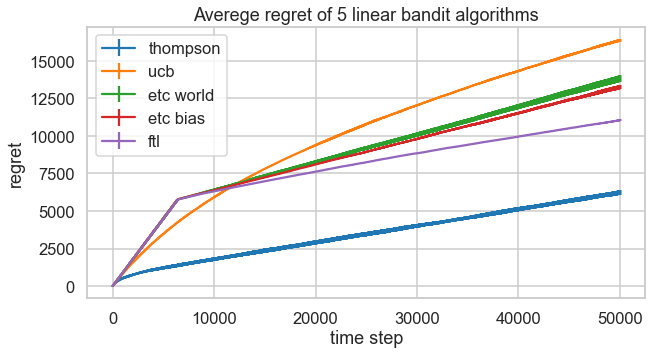

In [110]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel('time step')
ax.set_ylabel('regret')
ax.set_title('Averege regret of 5 linear bandit algorithms')

for key, values in result_dic.items():
    means = np.mean(values, axis=1)
    stds = np.std(values, axis=1)
    ax.errorbar(t, means, yerr=stds, label=key)
    
plt.legend()

I notice that while all models do some amount of learning, they eventually incur a linear regret. This regret is significantly better than random choice, as seen by comparing to the startup phase of ETC. However, this is a very unsatisfying result, especially because UCB does the worst. Again, I expected their to be linear regret given that the linear model with this feature set is not sufficient to eventually achieve perfect accuracy, but I would like to see better.

I looked at the beta and variance values during the UCB iterations, as well as their product, to ensure they are decreasing to zero as expected:

In [113]:
import agents
C = np.load('C.npy')
y = np.load('y.npy')

ucb = agents.UCB(C,y, 10000, gamma = 2, beta_type='det', max_bound=False)
ucb.run()

Context 42778 revealed with true label [4]
det V:  3.273390607898635e+150
Beta:  5.7061456149517875
Predicted reward:confidence
[[0.         2.85307281]
 [0.         2.85307281]
 [0.         2.85307281]
 [0.         2.85307281]
 [0.         2.85307281]
 [0.         2.85307281]
 [0.         2.85307281]
 [0.         2.85307281]
 [0.         2.85307281]
 [0.         2.85307281]]
Chose arm 4
Context 2329 revealed with true label [9]
det V:  4.910085911847652e+150
Beta:  [[5.75312424]]
Predicted reward:confidence
[[ 0.          2.87656212]
 [ 0.          2.87656212]
 [ 0.          2.87656212]
 [ 0.          2.87656212]
 [-0.06569053  2.8393229 ]
 [ 0.          2.87656212]
 [ 0.          2.87656212]
 [ 0.          2.87656212]
 [ 0.          2.87656212]
 [ 0.          2.87656212]]
Chose arm 0
Context 16198 revealed with true label [5]
det V:  7.365128867771448e+150
Beta:  [[5.79959963]]
Predicted reward:confidence
[[ 0.          2.83727993]
 [ 0.          2.89979981]
 [ 0.          2.89979981

/Users/ek/miniconda3/envs/cse541/lib/python3.10/site-packages/numpy/linalg/linalg.py:2158: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Context 26737 revealed with true label [5]
det V:  inf
Beta:  [[21.03573865]]
Predicted reward:confidence
[[ 0.16556842  3.67089202]
 [-0.1227611   4.30434288]
 [-0.04204102  4.41697467]
 [-0.05133855  4.38324812]
 [-0.09294785  4.65925596]
 [ 0.62940476  4.08706152]
 [-0.38070636  4.36716564]
 [ 0.00666739  4.05240217]
 [ 0.22947344  3.72798696]
 [-0.01104766  4.00942839]]
Chose arm 5
Context 32597 revealed with true label [4]
det V:  inf
Beta:  [[21.04026257]]
Predicted reward:confidence
[[-0.43987656  3.65689123]
 [-0.06466086  3.71412022]
 [-0.12184963  3.77974745]
 [-0.02411294  3.59765824]
 [ 0.47599938  3.42201163]
 [-0.12887266  3.92015818]
 [ 0.02031434  4.00706123]
 [ 0.04954283  3.67040439]
 [-0.34980168  3.48972509]
 [ 0.22988383  3.56002662]]
Chose arm 6
Context 25467 revealed with true label [0]
det V:  inf
Beta:  [[21.04470334]]
Predicted reward:confidence
[[ 0.70118192  2.40625753]
 [-0.26386642  2.9426425 ]
 [ 0.05288674  2.75329484]
 [ 0.10307273  2.75014954]
 [-0.124

Text(0.5, 1.0, 'beta t')

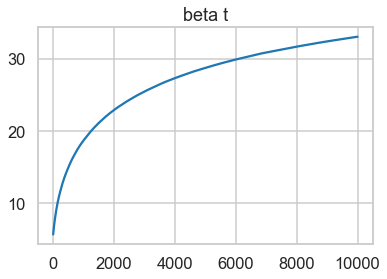

In [116]:
plt.plot(ucb.beta_log)
plt.title('beta t')

Text(0.5, 1.0, 'raw bound for action 1')

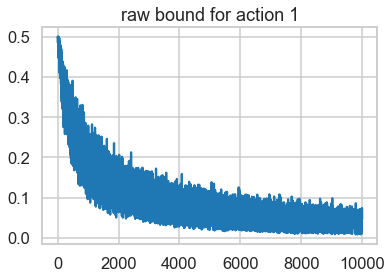

In [117]:
plt.plot(np.array(ucb.elip_log)[:,1])
plt.title('raw bound for action 1')

Text(0.5, 1.0, 'bound for action 1')

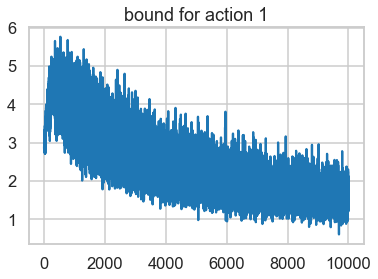

In [118]:
beta = np.vstack(ucb.beta_log).reshape(-1)
elip = np.array(ucb.elip_log)[:,2].reshape(-1)
bound = beta * elip
plt.plot(bound)
plt.title('bound for action 1')

The bound is decreasing with time as expected. I also tried a variety of tuning options: such as variable $\gamma$, using $\sqrt{\beta}$ or $\beta^2$, as well as various preprocesing techniques such as minmaxscaling instead of noramlization. After many __many__ hours I still was unable to get a perfect plateau, so I am left with these unsatisfying results. It could be possible that my conclusion that a linear estimator is simply not enough is not the case, and through different preprocessing techniques a better accuracy could be achieved.

One final test I did stemmed from the observation that $\beta$ was typically larger than $1.0$. This did not make sense to me: given that the reward is bounded to one, even our optimistic estimate of reward should not be more than $1.0$. Because of this, I tested UCB where at every iteration, the confidence bounds for all 10 actions were scaled such that the maximum was one. This strategy is shown below.

In [ ]:
ucb_maxed = np.load('UCB_maxed.npy')
means = np.mean(ucb_maxed, axis=1)
stds = np.std(ucb_maxed, axis=1)

fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel('time step')
ax.set_ylabel('regret')
ax.errorbar(t, means, yerr=stds, label=key)
ax.set_title('Regret of UCB maxed strategy')

# Code

### `agents.py`

In [ ]:
import numpy as np
import sklearn.linear_model
import scipy.stats
import sklearn.utils

n=10

def randargmax(b,**kw):
    return np.argmax(np.random.random(b.shape) * (b==b.max()), **kw)

class Agent:
    
    def __init__(self, C, y, T, n=n, gamma=1.0, log_rate=10):
        C, y =sklearn.utils.shuffle(C, y)
        self.C = C
        self.y = y
        self.T = T
        self.n = n
        self.gamma = gamma
        self.log_rate = log_rate
        self.R_log = []
        self.R = 0.0
        self.t = 0
        self.d = C.shape[1]
        self.phi_d = int(self.d*n)
        
        self.V = np.eye(self.phi_d) * gamma
        self.V_inv = np.linalg.inv(self.V)
        self.log_det_V0 = self.phi_d*np.log(self.gamma)
        self.log_det_V = self.phi_d*np.log(self.gamma)
        self.S = np.zeros((self.phi_d,1))
        
        self.L = max(np.linalg.norm(C, axis=1))
        
        self.startup()
        return
    
    @property
    def theta(self):
        return self.V_inv @ self.S
    
    def startup(self):
        raise NotImplemented()
        
    def phi(self, ind, a):
        """Featurize the action played and the context given.
        
        Parameters
        ----------
        ind : index of context raised
        a : index of action played
        """
        c = self.C[ind]
        out = np.zeros((self.n, c.size))
        out[a] = c
        assert out.size == self.phi_d
        return out.flatten()
    
    def r(self, ind, a):
        """Reward
        
        Parameters
        ----------
        ind : index of context raised
        a : index of action played
        """
        return int(self.y[ind] == a)
    
    def pull(self, ind, a):
        """Commit an agent action. Updates regret.
        
        The problem statement was fixed to have optimal policy always give reward of 1.
        So for a play is just 1 - reward
        
        Parameters
        ----------
        ind : index of context raised
        a : index of action played
        """
        r = self.r(ind, a)
        self.R += 1.0 - r
        
        self.t += 1
        if self.t % self.log_rate == 0:
            self.R_log.append((self.t, self.R))
            
        self.update(ind, a, r)
        # print(f'Pulled arm {a} for context {ind} and recieved reward {r}.')
        return r
    
    def run(self):
        """Run the algorithm until T."""
        
        while self.t < self.T:
            ind_t = np.random.choice(len(self.y))
            at = self.pick(ind_t)
            self.pull(ind_t, at)
        return
    
    def pick(self, ind):
        """Pick arm based on context vector
        
        parameters
        ind - index of the context that was raised
        """
        raise NotImplemented()
        
    def update(self, ind, a, r):
        phis = self.phi(ind,a).reshape((-1,1))
        self.S += r * phis
        self.V += phis @ (phis.T)
        self.log_det_V = self.log_det_V + np.log(1 + phis.T @ self.V_inv @ phis)
        self.V_inv = self.V_inv - (self.V_inv @ phis @ phis.T @ self.V_inv)/(1 + phis.T @ self.V_inv @ phis)
        return
            
        
class ETC_world(Agent):
    
    def __init__(self, C, y, T, tau, n=10, log_rate=10):
        self.tau = tau
        super().__init__(C, y, T, n=n, log_rate=log_rate)
        return
    
    def startup(self):
        
        for i in range(self.tau):
            
            ind_t = np.random.choice(len(self.y))
            at = np.random.choice(self.n)
            r = self.pull(ind_t, at)
        self.theta_lock = np.array(self.theta)
        return
            
    def pick(self, ind):
        phis = [self.phi(ind, a) for a in range(self.n)]
        r_hats = [self.theta_lock.reshape(1,-1) @ phi.reshape(-1,1) for phi in phis]
        return np.argmax(r_hats)
    
    
class ETC_bias(Agent):
    
    def __init__(self, C, y, T, tau, n=10, log_rate=10):
        self.tau = tau
        super().__init__(C, y, T, n=n, log_rate=log_rate)
        return
    
    def startup(self):
        Cs = []
        ys = []
        for i in range(self.tau):
            ind_t = np.random.choice(len(self.y))
            at = np.random.choice(self.n)
            r = self.pull(ind_t, at)
            if r == 1:
                Cs.append(self.C[ind_t])
                ys.append(self.y[ind_t])
        Cs = np.array(Cs)
        ys = np.array(ys).reshape(-1,1)
        
        model = sklearn.linear_model.SGDClassifier()
        model.fit(Cs, ys)
        self.model = model
        return
            
    def pick(self, ind):
        at = self.model.predict(self.C[ind].reshape(1,-1))
        return int(at)
    
    
class FTL(ETC_world):
    
    def pick(self, ind):
        phis = [self.phi(ind, a) for a in range(self.n)]
        r_hats = np.array([self.theta.reshape(1,-1) @ phi.reshape(-1,1) for phi in phis])
        return randargmax(r_hats)
    

class UCB(Agent):
    
    def __init__(self, C, y, T, beta_type='const', max_bound=False, n=n, gamma=1.0, log_rate=10):
        self.max_bound = max_bound
        self.beta_type = beta_type
        self.beta_log = []
        self.elip_log = []
        super().__init__(C, y, T, n=n, log_rate=log_rate, gamma=gamma)
        return
    
    
    def startup(self):
        self.del_ = 1/self.T
        return
    
    @property
    def beta(self):
        if self.beta_type == 'det':
            return (
                np.sqrt(self.gamma) + np.sqrt(
                    2*np.log(1/self.del_) + self.log_det_V - self.log_det_V0)
                )
        elif self.beta_type == 'const':
            return (
                np.sqrt(self.gamma) + np.sqrt(
                    2*np.log(1/self.del_)
                )
            )
        elif self.beta_type == 'L':
            d = self.phi_d
            return (
                np.sqrt(self.gamma) + np.sqrt(
                    2*np.log(1/self.del_) + d*np.log((d*self.gamma + self.T*self.L**2)/(d*self.L)))
            )
    
    def pick(self, ind):
        print(f'Context {ind} revealed with true label {self.y[ind]}')
        beta = self.beta
        self.beta_log.append(beta)
        theta = self.theta
        phis = np.array([self.phi(ind, a) for a in range(self.n)])
        r_hats = phis @ theta
        elip = []
        for phi in phis:
            elip.append(phi.reshape(1,-1) @ self.V_inv @ phi.reshape(-1,1))
        elip = np.array(elip).reshape(-1,1)
        self.elip_log.append(elip)
        bound = beta * elip
        if self.max_bound:
            bound = bound/max(bound)
            
        print('det V: ', np.linalg.det(self.V))
        print('Beta: ', beta)
        print('Predicted reward:confidence')
        print(np.concatenate([r_hats, bound], axis=1))
        a = randargmax(r_hats + bound)
        print(f'Chose arm {a}')
        return a

class Thompson(Agent):
    
    def startup(self):
        return
    
    def pick(self, ind):
        theta = self.theta
        V_inv = self.V_inv
        theta_sample = scipy.stats.multivariate_normal(mean=theta.reshape(-1), cov=V_inv).rvs().reshape(-1,1)
        phis = np.array([self.phi(ind, a) for a in range(self.n)])
        r_hats = phis @ theta
        a = np.argmax(r_hats)
        return a


### `test_in_par.py`

In [ ]:
import sys

import numpy as np
import sklearn.decomposition
from joblib import Parallel, delayed

import agents

n_replicates = 3
n_jobs = int(sys.argv[1])

kwargs = {
    'ETC_world': {'tau': 6422},
    'ETC_bias': {'tau': 6422},
    'FTL': {'tau': 6422},
    'UCB': dict(gamma = 2, beta_type='det', max_bound=False),
    'Thompson': {}
}

C = np.load('C.npy')
y = np.load('y.npy')

def test_agent_in_replicate(agent_class, kwargs):
    R_logs = []
    
    for i in range(n_replicates):
        agent = agent_class(C, y, 50000, **kwargs)
        agent.run()
        R_logs.append(np.array(agent.R_log)[:,1])
        t_vec = np.array(agent.R_log)[:,0]
    
    R_logs = np.array(R_logs).T
    np.save(f'{agent_class.__name__}.npy', R_logs)
    np.save('t.npy', t_vec)
    
if __name__ == '__main__':
    inputs = zip(
        [
            agents.ETC_world, agents.ETC_bias, agents.FTL, agents.UCB, agents.Thompson
        ],
        [
            kwargs['ETC_world'], kwargs['ETC_bias'], kwargs['FTL'], kwargs['UCB'], kwargs['Thompson']
        ]
    )
    Parallel(n_jobs=n_jobs)(delayed(test_agent_in_replicate)(*i) for i in inputs)
    
    class UCB_maxed(agents.UCB):
        maxed = True

    # do a test for maxing out
    test_agent_in_replicate(UCB_maxed, dict(gamma = 2, beta_type='det', max_bound=True))


In [47]:
class ETC(Agent):
    
    def __init__(self, C, y, T, tau, n=n, log_rate=10):
        self.tau = tau
        super().__init__(C, y, T, n=n, log_rate=log_rate)
        return
    
    def startup(self):
        
        for i in range(self.tau):
            
            ind_t = np.random.choice(len(self.y))
            at = np.random.choice(self.n)
            r = self.pull(ind_t, at)
        self.theta_lock = np.array(self.theta)
        return
            
    def pick(self, ind):
        phis = [self.phi(ind, a) for a in range(self.n)]
        r_hats = [self.theta_lock.reshape(1,-1) @ phi.reshape(-1,1) for phi in phis]
        return np.argmax(r_hats)

In [48]:
etc = ETC(C,y, 6000, 5000)

KeyboardInterrupt: 

In [ ]:
_ = etc.run()

In [ ]:
plt.plot(*np.array(etc.R_log).T)

In [ ]:
class ETC_bias(Agent):
    
    def __init__(self, C, y, T, tau, n=n, log_rate=10):
        self.tau = tau
        super().__init__(C, y, T, n=n, log_rate=log_rate)
        return
    
    def startup(self):
        Cs = []
        ys = []
        for i in range(self.tau):
            ind_t = np.random.choice(len(self.y))
            at = np.random.choice(self.n)
            r = self.pull(ind_t, at)
            if r == 1:
                Cs.append(self.C[ind_t])
                ys.append(self.y[ind_t])
        Cs = np.array(Cs)
        ys = np.array(ys).reshape(-1,1)
        
        model = sklearn.linear_model.SGDClassifier()
        model.fit(Cs, ys)
        self.model = model
        return
            
    def pick(self, ind):
        at = self.model.predict(self.C[ind].reshape(1,-1))
        return int(at)

In [ ]:
etc_bias = ETC_bias(C,y, 20000, 1000)

In [ ]:
etc_bias.run()

In [ ]:
plt.plot(*np.array(etc_bias.R_log).T)

In [ ]:
class FTL(ETC):
    
    def pick(self, ind):
        phis = [self.phi(ind, a) for a in range(self.n)]
        r_hats = np.array([self.theta.reshape(1,-1) @ phi.reshape(-1,1) for phi in phis])
        return randargmax(r_hats)
    

In [ ]:
ftl = FTL(C,y, 20000, 1000)

In [ ]:
ftl.run()

In [ ]:
np.linalg.norm(ftl.theta)

In [ ]:
plt.plot(*np.array(ftl.R_log).T)

In [112]:
class UCB(Agent):
    
    def __init__(self, C, y, T, beta_type='const', max_bound=False, n=n, gamma=1.0, log_rate=10):
        self.max_bound = max_bound
        self.beta_type = beta_type
        self.beta_log = []
        self.elip_log = []
        super().__init__(C, y, T, n=n, log_rate=log_rate, gamma=gamma)
        return
    
    
    def startup(self):
        self.del_ = 1/self.T
        return
    
    @property
    def beta(self):
        if self.beta_type == 'det':
            return (
                np.sqrt(self.gamma) + np.sqrt(
                    2*np.log(1/self.del_) + self.log_det_V - self.log_det_V0)
                )
        elif self.beta_type == 'const':
            return (
                np.sqrt(self.gamma) + np.sqrt(
                    2*np.log(1/self.del_)
                )
            )
        elif self.beta_type == 'L':
            d = self.phi_d
            return (
                np.sqrt(self.gamma) + np.sqrt(
                    2*np.log(1/self.del_) + d*np.log((d*self.gamma + self.T*self.L**2)/(d*self.L)))
            )
    
    def pick(self, ind):
        print(f'Context {ind} revealed with true label {self.y[ind]}')
        beta = self.beta
        self.beta_log.append(beta)
        theta = self.theta
        phis = np.array([self.phi(ind, a) for a in range(self.n)])
        r_hats = phis @ theta
        elip = []
        for phi in phis:
            elip.append(phi.reshape(1,-1) @ self.V_inv @ phi.reshape(-1,1))
        elip = np.array(elip).reshape(-1,1)
        self.elip_log.append(elip)
        bound = beta * elip
        if self.max_bound:
            bound = bound/max(bound)
            
        print('det V: ', np.linalg.det(self.V))
        print('Beta: ', beta)
        print('Predicted reward:confidence')
        print(np.concatenate([r_hats, bound], axis=1))
        a = randargmax(r_hats + bound)
        print(f'Chose arm {a}')
        return a

In [ ]:
ucb = UCB(C,y, 10000, gamma = 2, beta_type='det', max_bound=False)

In [ ]:
regret = ucb.run()

In [ ]:
plt.plot(*np.array(ucb.R_log).T)

In [ ]:
plt.plot(ucb.beta_log)

In [ ]:
plt.plot(np.array(ucb.elip_log)[:,1])

In [ ]:
beta = np.vstack(ucb.beta_log).reshape(-1)
elip = np.array(ucb.elip_log)[:,2].reshape(-1)

In [ ]:
bound = beta * elip

In [ ]:
plt.plot(bound)